## The System:

![grafik.png][def]


[def]: .\PTG_System.png

## Preperation

In [ ]:
#!pip install gurobipy==10.0.0
#!pip install pyomo==6.6.2
#!pip install numpy==1.24.3
#!pip install pandas==1.3.5
#!pip install matplotlib

In [5]:
from gurobipy import *
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsam.timeseriesaggregation as tsam


## Time Agreegation

load time series data


In [6]:
# Time series data of a whole year with hourly resolution
time_series_data = pd.read_excel(".\Data_Sheet_neu_2.xlsx")


print(time_series_data)

      Unnamed: 0  s     t  dt  PowerD_demand  HeatD_demand   P_PV_tot  \
0              0  1     1   1         134.16     88.455029    0.00000   
1              1  1     2   1         131.28     91.817355    0.00000   
2              2  1     3   1         130.56     92.851917    0.00000   
3              3  1     4   1         133.20     87.161827    0.00000   
4              4  1     5   1         133.20     96.214243    0.00000   
...          ... ..   ...  ..            ...           ...        ...   
8755        8755  1  8756   1         127.68    113.801792  114.32600   
8756        8756  1  8757   1         130.56    102.680253  124.98200   
8757        8757  1  8758   1         127.92    102.680253   72.58320   
8758        8758  1  8759   1         128.16     90.006872   53.43440   
8759        8759  1  8760   1         131.52     96.990164   10.01728   

      electricity_price  
0             -0.013287  
1             -0.002750  
2             -0.003778  
3             -0.01

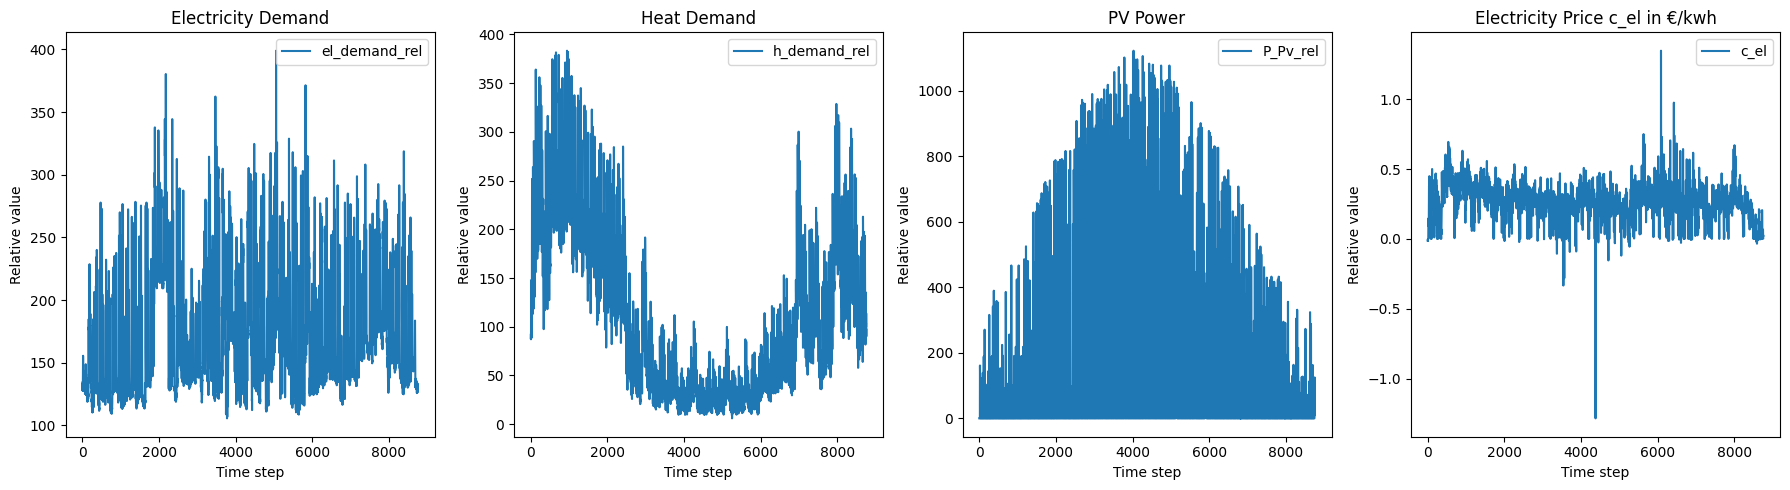

In [7]:
# Erstelle eine Figur mit 3 nebeneinanderliegenden Subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot für den ersten Datensatz
axes[0].plot(time_series_data['PowerD_demand'], label='el_demand_rel')
axes[0].set_xlabel('Time step')
axes[0].set_ylabel('Relative value')
axes[0].legend()
axes[0].set_title('Electricity Demand')

# Plot für den zweiten Datensatz
axes[1].plot(time_series_data['HeatD_demand'], label='h_demand_rel')
axes[1].set_xlabel('Time step')
axes[1].set_ylabel('Relative value')
axes[1].legend()
axes[1].set_title('Heat Demand')

# Plot für den dritten Datensatz
axes[2].plot(time_series_data['P_PV_tot'], label='P_Pv_rel')
axes[2].set_xlabel('Time step')
axes[2].set_ylabel('Relative value')
axes[2].legend()
axes[2].set_title('PV Power')

# Plot für den dritten Datensatz
axes[3].plot(time_series_data['electricity_price'], label='c_el')
axes[3].set_xlabel('Time step')
axes[3].set_ylabel('Relative value')
axes[3].legend()
axes[3].set_title('Electricity Price c_el in €/kwh')

# Layout anpassen
plt.tight_layout()

# Zeige die Plots
plt.show()

Time series aggregation


In [9]:
# aggregate time_series_data with the tsam package
noTypicalPeriods = 10
hoursPerPeriod = 24

aggregation = tsam.TimeSeriesAggregation(
        timeSeries                  = time_series_data,
        noTypicalPeriods            = noTypicalPeriods,
        hoursPerPeriod              = hoursPerPeriod,
        clusterMethod               = 'k_means',
        resolution                  = 1
    )
typical_day_time_series_data = aggregation.createTypicalPeriods()

print(typical_day_time_series_data)

            HeatD_demand    P_PV_tot  PowerD_demand   Unnamed: 0   dt  \
  TimeStep                                                              
0 0           115.969557    2.051939     167.989091  8116.909091  1.0   
  1           115.288620    0.027371     160.453636  8117.909091  1.0   
  2           124.307790    0.000000     157.369091  8118.909091  1.0   
  3           121.318629    0.027387     154.101818  8119.909091  1.0   
  4           143.393213    0.000000     152.446364  8120.909091  1.0   
...                  ...         ...            ...          ...  ...   
9 19           21.754263  937.101395     198.726316  4485.526316  1.0   
  20           22.276267  932.677632     197.668421  4486.526316  1.0   
  21           21.165181  839.366474     190.278947  4487.526316  1.0   
  22           21.182971  732.338263     182.778947  4488.526316  1.0   
  23           19.176186  573.576288     174.568421  4489.526316  1.0   

            electricity_price    s            t  


In [10]:
# Assign labels to each original period            #NEW
typical_days_row = aggregation.clusterOrder
print("Cluster Labels:")
print(typical_days_row)
print(len(typical_days_row))

Cluster Labels:
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 3 3 3 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 7 7 5 5 7 7 7 7 7 5 5 9 5
 5 7 7 7 5 5 7 5 7 9 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 5 9 9 9 9 5 5 5 5 5 9
 9 5 9 9 9 9 9 2 9 5 5 5 9 9 9 9 9 9 9 9 2 9 9 5 5 5 5 9 9 9 9 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 8 8 2 2 2 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 2 8 8 8 8 8
 2 2 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 0 0 0 0 6 6 6
 0 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
365


In [11]:
# print the number of days represented by each typical day
for typical_day in np.arange(noTypicalPeriods):
    print(f"Typical day {typical_day} represents {aggregation.clusterPeriodNoOccur[typical_day]} days in the original time series")
    

Typical day 0 represents 44 days in the original time series
Typical day 1 represents 17 days in the original time series
Typical day 2 represents 39 days in the original time series
Typical day 3 represents 27 days in the original time series
Typical day 4 represents 59 days in the original time series
Typical day 5 represents 31 days in the original time series
Typical day 6 represents 34 days in the original time series
Typical day 7 represents 42 days in the original time series
Typical day 8 represents 34 days in the original time series
Typical day 9 represents 38 days in the original time series


Für Seasonal_Storrage Zeitreihen erstellen

In [12]:
days_yeahr=[i for i in range(0, 365)]  #NEW
print(days_yeahr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [13]:
typical_days_dict = dict(zip(days_yeahr, typical_days_row))   #NEW
print(typical_days_dict)

{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 3, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 3, 59: 4, 60: 4, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 3, 94: 3, 95: 3, 96: 3, 97: 1, 98: 1, 99: 3, 100: 3, 101: 3, 102: 3, 103: 7, 104: 7, 105: 7, 106: 7, 107: 7, 108: 7, 109: 7, 110: 7, 111: 7, 112: 7, 113: 7, 114: 7, 115: 7, 116: 7, 117: 7, 118: 7, 119: 7, 120: 7, 121: 7, 122: 7, 123: 7, 124: 7, 125: 7, 126: 7, 127: 7, 128: 7, 129: 7, 130: 7, 131: 7, 132: 7, 133: 5, 134: 5, 135: 7, 136: 7, 137: 5, 138: 

In [14]:
typical_hours_row =[] #

    
for i in range(0, 365):  #NEW
    #print(i)
    for j in range(24):
        typical_hours_row.append(typical_days_dict[i]*24+j)
        
print(len(typical_hours_row))
print(typical_hours_row)

8760
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 

In [15]:
# Erstellen der Zahlenreihe von 0 bis 8759
zahlenreihe = list(range(0, 8760))

In [16]:
hours_to_typical_days= dict(zip(zahlenreihe,typical_hours_row))  #NEW
print(hours_to_typical_days)

{0: 96, 1: 97, 2: 98, 3: 99, 4: 100, 5: 101, 6: 102, 7: 103, 8: 104, 9: 105, 10: 106, 11: 107, 12: 108, 13: 109, 14: 110, 15: 111, 16: 112, 17: 113, 18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 96, 25: 97, 26: 98, 27: 99, 28: 100, 29: 101, 30: 102, 31: 103, 32: 104, 33: 105, 34: 106, 35: 107, 36: 108, 37: 109, 38: 110, 39: 111, 40: 112, 41: 113, 42: 114, 43: 115, 44: 116, 45: 117, 46: 118, 47: 119, 48: 96, 49: 97, 50: 98, 51: 99, 52: 100, 53: 101, 54: 102, 55: 103, 56: 104, 57: 105, 58: 106, 59: 107, 60: 108, 61: 109, 62: 110, 63: 111, 64: 112, 65: 113, 66: 114, 67: 115, 68: 116, 69: 117, 70: 118, 71: 119, 72: 96, 73: 97, 74: 98, 75: 99, 76: 100, 77: 101, 78: 102, 79: 103, 80: 104, 81: 105, 82: 106, 83: 107, 84: 108, 85: 109, 86: 110, 87: 111, 88: 112, 89: 113, 90: 114, 91: 115, 92: 116, 93: 117, 94: 118, 95: 119, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112,

In [17]:
# reindex time series to have unique single-dimensional index starting from 0
typical_day_time_series_data = typical_day_time_series_data.reset_index()
typical_day_time_series_data = typical_day_time_series_data.rename(columns={'level_0': 'typical_day'})
typical_day_time_series_data.index = np.arange(0, noTypicalPeriods * hoursPerPeriod)
#TimeStep von 1 bis 95 laufen lassen:
typical_day_time_series_data['TimeStep'] = np.arange(0, noTypicalPeriods * hoursPerPeriod)
print(typical_day_time_series_data)

     typical_day  TimeStep  HeatD_demand    P_PV_tot  PowerD_demand  \
0              0         0    115.969557    2.051939     167.989091   
1              0         1    115.288620    0.027371     160.453636   
2              0         2    124.307790    0.000000     157.369091   
3              0         3    121.318629    0.027387     154.101818   
4              0         4    143.393213    0.000000     152.446364   
..           ...       ...           ...         ...            ...   
235            9       235     21.754263  937.101395     198.726316   
236            9       236     22.276267  932.677632     197.668421   
237            9       237     21.165181  839.366474     190.278947   
238            9       238     21.182971  732.338263     182.778947   
239            9       239     19.176186  573.576288     174.568421   

      Unnamed: 0   dt  electricity_price    s            t  
0    8116.909091  1.0           0.160935  1.0  8117.909091  
1    8117.909091  1.0    

In [18]:
#modified_time_series_data.to_excel('modified_time_series_data_new.xlsx', index=False)


## Time series
#### Daten laden

In [20]:
print(time_series_data)

      HeatD_demand   P_PV_tot  PowerD_demand  Unnamed: 0  dt  \
0        88.455029    0.00000         134.16           0   1   
1        91.817355    0.00000         131.28           1   1   
2        92.851917    0.00000         130.56           2   1   
3        87.161827    0.00000         133.20           3   1   
4        96.214243    0.00000         133.20           4   1   
...            ...        ...            ...         ...  ..   
8755    113.801792  114.32600         127.68        8755   1   
8756    102.680253  124.98200         130.56        8756   1   
8757    102.680253   72.58320         127.92        8757   1   
8758     90.006872   53.43440         128.16        8758   1   
8759     96.990164   10.01728         131.52        8759   1   

      electricity_price  s     t  
0             -0.013287  1     1  
1             -0.002750  1     2  
2             -0.003778  1     3  
3             -0.013056  1     4  
4             -0.011539  1     5  
...                 .

In [21]:
print(typical_day_time_series_data)

     typical_day  TimeStep  HeatD_demand    P_PV_tot  PowerD_demand  \
0              0         0    115.969557    2.051939     167.989091   
1              0         1    115.288620    0.027371     160.453636   
2              0         2    124.307790    0.000000     157.369091   
3              0         3    121.318629    0.027387     154.101818   
4              0         4    143.393213    0.000000     152.446364   
..           ...       ...           ...         ...            ...   
235            9       235     21.754263  937.101395     198.726316   
236            9       236     22.276267  932.677632     197.668421   
237            9       237     21.165181  839.366474     190.278947   
238            9       238     21.182971  732.338263     182.778947   
239            9       239     19.176186  573.576288     174.568421   

      Unnamed: 0   dt  electricity_price    s            t  
0    8116.909091  1.0           0.160935  1.0  8117.909091  
1    8117.909091  1.0    

In [22]:
time_slices = np.array(typical_day_time_series_data.index)

shifted_time_slices = [] # time slice number shifted by 1 to create the storage level constraint
time_slice_weight = []

for typical_period in np.arange(noTypicalPeriods):
    time_slices_within_typical_period = typical_day_time_series_data[typical_day_time_series_data.typical_day == typical_period].index
    shifted_time_slices_within_period = np.roll(time_slices_within_typical_period,-1)
    shifted_time_slices.extend(shifted_time_slices_within_period) 
    time_slice_weight.extend(aggregation.clusterPeriodNoOccur[typical_period]*np.ones(len(time_slices_within_typical_period)))
    
print(shifted_time_slices)
print(time_slice_weight)

# weight of each time slice [h]
time_slice_weight = dict(zip(time_slices, time_slice_weight))

# consecutive time slice of each time slice
next_time_slice = dict(zip(time_slices, shifted_time_slices))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 72, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 120, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 144, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 168, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 192, 217, 218, 219, 220, 221, 222,

In [23]:
# Erstellen des Dictionaries
storage_next_time_slices = {zahlenreihe[i]: zahlenreihe[(i + 1) % len(zahlenreihe)] for i in range(len(zahlenreihe))}

# Ausgabe des Ergebnisses
print(storage_next_time_slices)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [24]:
print(time_slices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239]


In [25]:
 # gas price of each time slice
power_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['PowerD_demand'])))

# # heat demand of each time slice
heat_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['HeatD_demand'])))

# # electricity_price of each time slice
electricity_price_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['electricity_price'])))

# # PV_Power of eacj time slice
power_PV_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['P_PV_tot'])))
for timeslice in power_PV_time_series:
        if power_PV_time_series[timeslice] > 900:
            power_PV_time_series[timeslice] = 900


## Setting up the model:

In [26]:
model = ConcreteModel()


# declare sets
model.time_slices = set(time_slices)
model.time_slices_through_whole_yeahr = set(zahlenreihe)

In [27]:
print(model.time_slices)
print(model.time_slices_through_whole_yeahr)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [28]:
# declare decision variables
model.OPEX = Var(domain=NonNegativeReals) # [€]

# declare time dependent decision variables
model.P_e_buy = Var(model.time_slices, domain=NonNegativeReals) # Power, that needs to get bought from the grid [kW_e]
model.P_CH4_sell = Var(model.time_slices, domain=NonNegativeReals) # CH4, that gets to sell to the grid [kW_CH4]
model.mdot_CO2_atm = Var(model.time_slices, domain=NonNegativeReals) # CO2 emissions [kg_CO2/hr]

# Component_Inputs
model.P_e_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_e]
model.P_e_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kW_e]
model.P_H2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_H2]
model.mdot_CO2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CO2] STIMMT EINHEIT???
model.P_CH4_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_CH4]
model.P_CH4_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_CH4]

model.y_PEM = Var(model.time_slices, domain=Binary) # Electrolysis, on/off
model.y_CHP = Var(model.time_slices, domain=Binary) # CombinedHeatPower, on/off
model.y_BO = Var(model.time_slices, domain=Binary) # Boiler, on/off

# Component_Outputs
model.P_e_PV = Var(model.time_slices, domain=NonNegativeReals) # PV [kW_e]
model.P_H2_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_H2]
model.mdot_CO2_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kg_CO2/hr]
model.P_CH4_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CH4]
model.P_e_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_e]
model.P_h_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_h]
model.P_h_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_h]                      

# Storages
model.P_e_battery = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_e]  #hier ist die Frage_model.time_slices oder model.time_slices_through_whole_yeahr
model.P_e_battery_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_e] 
model.P_e_battery_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) #  [kW_e]
model.storage_level_battery = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_battery =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_battery = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_e_battery_yearly = Var(model.time_slices_through_whole_yeahr, domain=Reals) # [kW_e]

model.P_h_thermalStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_h]
model.P_h_thermalStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.P_h_thermalStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.storage_level_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_thermalStorage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_h_thermalStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_h]

model.P_H2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_H2]
model.P_H2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.P_H2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.storage_level_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_H2]
model.in_H2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_H2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_H2]

model.mdot_CO2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kg_CO2/hr]
model.mdot_CO2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.mdot_CO2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.storage_level_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2]
model.in_CO2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.mdot_CO2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kg_CO2/hr]

model.P_CH4_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_CH4]
model.P_CH4_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.P_CH4_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.storage_level_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_CH4]
model.in_CH4Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_CH4_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_CH4]

In [29]:
# declare parameters

model.price_co2 = 0.0844 # [€/ton]
model.price_gas = 0.0775 # [€/kWh]

model.co2_ch4_relation = 2.744 #[kg_CO2/kg_CH4]

model.P_e_min_PEM = 180 #[kW_e]
model.P_e_max_PEM = 1080 #[kW_e]

model.mdot_CO2_N_DAC = 250 #[kg_CO2/hr]
model.eta_DAC = 0.5 #[kg_CO2/kWh_e]

model.P_CH4_N_MR = 1500 #[kW_CH4]
model.eta_MR = 0.78
model.co2need_MR = 0.178 #E_in_CO2/E_out_CH4 [kg_CO2/kWh_CH4]

model.P_h_min_CHP = 400 #[kW_h]
model.P_h_max_CHP = 800 #[kW_h]

model.P_h_min_BO = 0.5 #[kW_h]
model.P_h_max_BO = 500 #[kW_h]

model.E_N_battery = 5000 #[kWh_e]
model.eta_battery = 0.92 
model.loss_battery = 0.000042 #[1/hr]
model.c_battery = 0.36 #[1/hr]

model.Q_N_thermalStorage = 5000 #[kWh_Q]
model.eta_thermalStorage = 0.95 
model.loss_thermalStorage = 0.005 #[1/hr]
model.c_thermalStorage = 1 #[1/hr]

model.E_N_H2Storage = 5000 #[kWh_H2]
model.m_N_CO2Storage = 5000 #[kg_CO2]
model.E_N_CH4Storage = 5000 #[kWh_CH4]
model.loss_gasTanks = 0 #[1/hr]
model.eta_gasTanks = 1 
model.c_gasTanks = 0.25 #[1/hr]


In [30]:
#declare time dependent parameters
model.P_e_demand = Param(model.time_slices, initialize = power_demand_time_series)
model.Q_demand = Param(model.time_slices, initialize = heat_demand_time_series)

model.electricity_price = Param(model.time_slices, initialize = electricity_price_time_series)

model.P_PV = Param(model.time_slices, initialize = power_PV_time_series)


In [31]:
# declare unindexed constraints
model.OPEX_constraint = Constraint(expr =  model.OPEX == sum(model.electricity_price[time_slice]*model.P_e_buy[time_slice] for time_slice in model.time_slices) 
                                     -  sum(model.price_gas * model.P_CH4_sell[time_slice] for time_slice in model.time_slices)
                                    +  sum(model.price_co2 * model.mdot_CO2_atm[time_slice] for time_slice in model.time_slices))

# declare rules to setup indexed constraints
def electricty_balance_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] + model.P_e_CHP[time_slice] + model.P_e_battery[time_slice] + model.P_e_buy[time_slice] == model.P_e_demand[time_slice] + model.P_e_PEM[time_slice] + model.P_e_DAC[time_slice])

def heat_balance_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] + model.P_h_BO[time_slice] + model.P_h_thermalStorage[time_slice] == model.Q_demand[time_slice])

def h2_balance_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] + model.P_H2_gasStorage[time_slice] == model.P_H2_MR[time_slice])

def co2_balance_contraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] + model.mdot_CO2_gasStorage[time_slice] == model.mdot_CO2_MR[time_slice])

def ch4_balance_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] + model.P_CH4_gasStorage[time_slice] == model.P_CH4_CHP[time_slice] + model.P_CH4_BO[time_slice] + model.P_CH4_sell[time_slice])

def co2_emmission_constraint_rule(model, time_slice):
    return (model.mdot_CO2_atm[time_slice] == model.co2_ch4_relation * (model.P_CH4_BO[time_slice] + model.P_CH4_CHP[time_slice]))



def PV_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] == model.P_PV[time_slice])

def PEM_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] == 47.877 * model.y_PEM[time_slice] + 0.549 * model.P_e_PEM[time_slice])
def PEM_minInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] >= model.P_e_min_PEM * model.y_PEM[time_slice])
def PEM_maxInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] <= model.P_e_max_PEM* model.y_PEM[time_slice])

def DAC_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] == model.eta_DAC * model.P_e_DAC[time_slice])
def DAC_maxOuput_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] <= model.mdot_CO2_N_DAC)

def MR_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] == model.eta_MR * model.P_H2_MR[time_slice])
def MR_CO2_constraint_rule(model, time_slice):
    return (model.mdot_CO2_MR[time_slice] == model.co2need_MR * model.P_CH4_MR[time_slice])
def MR_maxOuput_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] <= model.P_CH4_N_MR)

def CHP_heat_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] == 0.47 * model.P_CH4_CHP[time_slice])

def CHP_heat_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] == -2416.78 * model.y_CHP[time_slice] + 1.90 * model.P_CH4_CHP[time_slice] 
def CHP_heat_minOuput_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] >= model.P_h_min_CHP * model.y_CHP[time_slice]
def CHP_heat_maxOuput_constraint_rule(model, time_slice):
    return model.P_h_CHP[time_slice] <= model.P_h_max_CHP * model.y_CHP[time_slice]
def CHP_electricity_constraint_rule(model, time_slice):
    return (model.P_e_CHP[time_slice] == -2042.74 * model.y_CHP[time_slice] + 1.61 * model.P_CH4_CHP[time_slice]) 
    
def BO_constraint_rule(model, time_slice):
    return (model.P_CH4_BO[time_slice]  == 113.95 * model.y_BO[time_slice] + 0.82 * model.P_h_BO[time_slice])
def BO_minOuput_constraint_rule(model, time_slice):
    return (model.P_h_BO[time_slice] >= model.P_h_min_BO * model.y_BO[time_slice])
def BO_maxOuput_constraint_rule(model, time_slice):
    return (model.P_h_BO[time_slice] <= model.P_h_max_BO * model.y_BO[time_slice])



#Battery
def battery_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return (model.storage_level_battery[storage_next_time_slices[time_slice_through_whole_yeahr]] == 
        model.storage_level_battery[time_slice_through_whole_yeahr] * (1-model.loss_battery)
        + (model.P_e_battery_in[time_slice_through_whole_yeahr]*model.eta_battery - model.P_e_battery_out[time_slice_through_whole_yeahr]/model.eta_battery))
    
def battery_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_yearly[time_slice_through_whole_yeahr] == -model.P_e_battery_in[time_slice_through_whole_yeahr] + model.P_e_battery_out[time_slice_through_whole_yeahr])
    
def battery_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_in[time_slice_through_whole_yeahr] <= model.in_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)
    
def battery_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_out[time_slice_through_whole_yeahr] <= model.out_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)

def battery_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_battery[time_slice_through_whole_yeahr] + model.out_battery[time_slice_through_whole_yeahr] <= 1)

def connect_battery_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_e_battery_yearly[time_slices_though_whole_year] == model.P_e_battery[hours_to_typical_days[time_slices_though_whole_year]]



#thermalStorage
def thermalStorage_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.storage_level_thermalStorage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_thermalStorage[time_slice_through_whole_yeahr] * (1-model.loss_thermalStorage)
        + (model.P_h_thermalStorage_in[time_slice_through_whole_yeahr]*model.eta_thermalStorage - model.P_h_thermalStorage_out[time_slice_through_whole_yeahr]/model.eta_thermalStorage)))

def thermalStorage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):  
    return  (model.P_h_thermalStorage_yearly[time_slices_through_whole_yeahr] == - model.P_h_thermalStorage_in[time_slices_through_whole_yeahr] + model.P_h_thermalStorage_out[time_slices_through_whole_yeahr])  

def thermalStorage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):        
    return  (model.P_h_thermalStorage_in[time_slices_through_whole_yeahr] <= model.in_thermalStorage[time_slices_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.P_h_thermalStorage_out[time_slices_through_whole_yeahr] <= model.out_thermalStorage[time_slices_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.in_thermalStorage[time_slices_through_whole_yeahr] + model.out_thermalStorage[time_slices_through_whole_yeahr] <= 1)

def connect_thermalStorage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_h_thermalStorage_yearly[time_slices_though_whole_year] == model.P_h_thermalStorage[hours_to_typical_days[time_slices_though_whole_year]]


#H2Storage
def H2Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.storage_level_H2Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_H2Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_H2_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.P_H2_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))   
    
def H2Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.P_H2_gasStorage_in[time_slices_through_whole_yeahr] + model.P_H2_gasStorage_out[time_slices_through_whole_yeahr]) 

def H2Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_H2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_H2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_H2Storage[time_slices_through_whole_yeahr] + model.out_H2Storage[time_slices_through_whole_yeahr] <= 1)

def connect_H2Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_H2_gasStorage_yearly[time_slices_though_whole_year] == model.P_H2_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


#CO2Storage
def CO2Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.storage_level_CO2Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_CO2Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))   
    
def CO2Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr] + model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr])  

def CO2Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_CO2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_CO2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_CO2Storage[time_slices_through_whole_yeahr] + model.out_CO2Storage[time_slices_through_whole_yeahr] <= 1)

def connect_CO2Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.mdot_CO2_gasStorage_yearly[time_slices_though_whole_year] == model.mdot_CO2_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


#CH4Storage	
def CH4Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.storage_level_CH4Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_CH4Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))

def CH4Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr] + model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr])

def CH4Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_CH4Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_CH4Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_CH4Storage[time_slices_through_whole_yeahr] + model.out_CH4Storage[time_slices_through_whole_yeahr] <= 1)

def connect_CH4Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_CH4_gasStorage_yearly[time_slices_though_whole_year] == model.P_CH4_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


# declare indexed constraints

model.CH4Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_constraint_rule)
model.CH4Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_Energy_balance_constraint_rule)
model.CH4Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_in_constraint_rule)
model.CH4Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_out_constraint_rule)
model.CH4Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_in_or_out_or_off_constraint_rule)
model.connect_CH4Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CH4Storage_time_slices_rule)

model.Co2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_constraint_rule)
model.Co2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_Energy_balance_constraint_rule)
model.Co2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_out_constraint_rule)
model.Co2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_in_constraint_rule)
model.Co2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_in_or_out_or_off_constraint_rule)
model.connect_CO2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CO2Storage_time_slices_rule)

model.H2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_constraint_rule)
model.H2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_Energy_balance_constraint_rule)
model.H2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_out_constraint_rule)
model.H2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_in_constraint_rule)
model.H2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_in_or_out_or_off_constraint_rule)
model.commect_H2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_H2Storage_time_slices_rule)

model.thermalStorage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_constraint_rule)
model.thermalStorage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_Energy_balance_constraint_rule)
model.thermalStorage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_out_constraint_rule)
model.thermalStorage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_in_constraint_rule)
model.thermalStorage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_in_or_out_or_off_constraint_rule)
model.connect_thermalStorage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_thermalStorage_time_slices_rule)

model.battery_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_constraint_rule)
model.battery_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_Energy_balance_constraint_rule)
model.battery_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_out_constraint_rule)
model.battery_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_in_constraint_rule)
model.battery_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_in_or_out_or_off_constraint_rule)
model.connect_battery_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_battery_time_slices_rule)



model.electricty_balance_constraint = Constraint(model.time_slices, rule=electricty_balance_constraint_rule)
model.heat_balance_constraint = Constraint(model.time_slices, rule=heat_balance_constraint_rule)
model.h2_balance_constraint = Constraint(model.time_slices, rule=h2_balance_constraint_rule)
model.co2_balance_contraint = Constraint(model.time_slices, rule=co2_balance_contraint_rule)
model.ch4_balance_constraint = Constraint(model.time_slices, rule=ch4_balance_constraint_rule)
model.co2_emission_constraint = Constraint(model.time_slices, rule=co2_emmission_constraint_rule)

model.PV_constraint = Constraint(model.time_slices, rule=PV_constraint_rule)
model.PEM_constraint = Constraint(model.time_slices, rule=PEM_constraint_rule)
model.PEM_minInput_constraint = Constraint(model.time_slices, rule=PEM_minInput_constraint_rule)
model.PEM_maxInput_constraint = Constraint(model.time_slices, rule=PEM_maxInput_constraint_rule)
model.DAC_constraint = Constraint(model.time_slices, rule=DAC_constraint_rule)
model.DAC_maxOuput_constraint = Constraint(model.time_slices, rule=DAC_maxOuput_constraint_rule)
model.MR_constraint = Constraint(model.time_slices, rule=MR_constraint_rule)
model.MR_CO2_constraint = Constraint(model.time_slices, rule=MR_CO2_constraint_rule)
model.MR_maxOuput_constraint = Constraint(model.time_slices, rule=MR_maxOuput_constraint_rule)
model.CHP_heat_constraint = Constraint(model.time_slices, rule=CHP_heat_constraint_rule)
model.CHP_heat_minOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_minOuput_constraint_rule)
model.CHP_heat_maxOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_maxOuput_constraint_rule)
model.CHP_electricity_constraint = Constraint(model.time_slices, rule=CHP_electricity_constraint_rule)
model.BO_constraint = Constraint(model.time_slices, rule=BO_constraint_rule)
model.BO_minOuput_constraint = Constraint(model.time_slices, rule=BO_minOuput_constraint_rule)
model.BO_maxOuput_constraint = Constraint(model.time_slices, rule=BO_maxOuput_constraint_rule)


## Solving the problem

In [32]:
# declare objective
model.total_costs = Objective(expr = model.OPEX,
    sense = minimize)

In [ ]:
# Solver
solver = SolverFactory('gurobi')
#solver.options['TimeLimit'] = 3600  # Zeitlimit in Sekunden (hier 1 Stunde)
#solver.options['MIPGap'] = 0.01  # Maximale Abweichung von der optimalen Lösung in Prozent
solver.options['NodeLimit'] = 4000  # Maximale Anzahl an Knoten im Baum, die der Solver durchlaufen soll
#solver.options['IterationLimit'] = 1000  # Maximale Anzahl an Iterationen
solver.options['MIPGap'] = 0.02  # Beispiel für einen sehr kleinen MIPGap
solver.options['Heuristics'] = 0.8  # Aktiviere Heuristiken zu 80%
#solver.options['Cuts'] = 1  # Aktiviere aggressive Schnitte

# Modell lösen
results = solver.solve(model, tee=True)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-14
Read LP format model from file C:\Users\Raphael\AppData\Local\Temp\tmpevshgf_h.pyomo.lp
Reading time = 1.95 seconds
x1: 268081 rows, 268561 columns, 671161 nonzeros
Set parameter NodeLimit to value 4000
Set parameter MIPGap to value 0.02
Set parameter Heuristics to value 0.8
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 268081 rows, 268561 columns and 671161 nonzeros
Model fingerprint: 0x58d49986
Variable types: 180241 continuous, 88320 integer (88320 binary)
Coefficient statistics:
  Matrix range     [1e-02, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 2e+03]
Presolve removed 90000 rows and 89520 columns (presolve time = 5

  102759    1.7294525e+04   0.000000e+00   2.604042e+02    546s
  103352    1.7292203e+04   0.000000e+00   3.690505e+02    551s
  103692    1.7286839e+04   0.000000e+00   8.336828e+01    555s
  104182    1.7251882e+04   0.000000e+00   3.861988e+02    561s
  104512    1.7213934e+04   0.000000e+00   5.063090e+02    566s
  104933    1.7132469e+04   0.000000e+00   1.397459e+02    571s
  105393    1.7069602e+04   0.000000e+00   7.271580e+01    576s
  105913    1.7033338e+04   0.000000e+00   9.861720e+01    580s
  106363    1.6995232e+04   0.000000e+00   1.058146e+02    585s
  107962    1.6388000e+04   0.000000e+00   2.170035e+05    591s
  108382    1.6293200e+04   0.000000e+00   3.900481e+03    596s
  109264    1.5997180e+04   0.000000e+00   1.537527e+03    601s
  110044    1.5907862e+04   0.000000e+00   4.896110e+01    607s
  110627    1.5881877e+04   0.000000e+00   5.468122e+01    611s
  111193    1.5850806e+04   0.000000e+00   7.097990e+01    616s
  111789    1.5792227e+04   0.000000e+00

     0     0 13560.1030    0 2943 25847.9619 13560.1030  47.5%     - 1705s
     0     0 13560.9469    0 2952 25847.9619 13560.9469  47.5%     - 1707s
     0     0 13561.4695    0 2962 25847.9619 13561.4695  47.5%     - 1710s
     0     0 13562.0779    0 2936 25847.9619 13562.0779  47.5%     - 1714s
     0     0 13562.9657    0 2980 25847.9619 13562.9657  47.5%     - 1717s
     0     0 13563.3007    0 2988 25847.9619 13563.3007  47.5%     - 1722s
     0     0 13564.1467    0 2996 25847.9619 13564.1467  47.5%     - 1724s
     0     0 13564.6217    0 3004 25847.9619 13564.6217  47.5%     - 1727s
     0     0 13565.2995    0 3012 25847.9619 13565.2995  47.5%     - 1729s
     0     0 13565.7423    0 3020 25847.9619 13565.7423  47.5%     - 1731s
     0     0 13566.5528    0 3028 25847.9619 13566.5528  47.5%     - 1733s
     0     0 13567.1016    0 3027 25847.9619 13567.1016  47.5%     - 1735s
     0     0 13567.4709    0 3107 25847.9619 13567.4709  47.5%     - 1737s
     0     0 13567.5745  

In [ ]:
print(f"OPEX = {model.OPEX.value} €")

In [ ]:
import matplotlib.pyplot as plt

# Liste der Variablennamen, die geplottet werden sollen
variables_to_plot = ['P_e_buy', 'P_CH4_sell', 'P_e_PV', 'P_e_CHP', 'P_e_battery', 'P_e_PEM', 'P_e_DAC', 'P_h_BO']

# Plotten der Variablen
for var_name in variables_to_plot:
    var_object = getattr(model, var_name)
    time_steps = sorted(var_object.index_set())
    values = [var_object[t].value for t in time_steps]
    
    plt.figure()
    plt.plot(time_steps, values, marker='o')
    plt.xlabel('Time Step')
    plt.ylabel(var_name)
    plt.title(f'{var_name} over Time')
    plt.grid(True)
    plt.show()



In [ ]:
import json

# Pfad zum Speichern der JSON-Datei
file_path = 'variable_values.json'

# Sammle alle Variablenwerte und konvertiere die Schlüssel in Strings
variable_values = {}
variable_values['OPEX'] = model.OPEX.value

time_slices = model.time_slices
time_slices_through_whole_yeahr = model.time_slices_through_whole_yeahr

variables_to_save = [
    'P_e_buy', 'P_CH4_sell', 'mdot_CO2_atm', 'P_e_PEM', 'P_e_DAC', 'P_H2_MR', 'mdot_CO2_MR', 
    'P_CH4_CHP', 'P_CH4_BO', 'y_PEM', 'y_CHP', 'y_BO', 'P_e_PV', 'P_H2_PEM', 'mdot_CO2_DAC', 
    'P_CH4_MR', 'P_e_CHP', 'P_h_CHP', 'P_h_BO', 'P_e_battery', 'P_h_thermalStorage', 
    'P_H2_gasStorage', 'mdot_CO2_gasStorage', 'P_CH4_gasStorage'
]

for var_name in variables_to_save:
    variable_values[var_name] = {str(t): getattr(model, var_name)[t].value for t in time_slices}

variables_to_save_through_whole_yeahr = [
    'P_e_battery_in', 'P_e_battery_out', 'storage_level_battery', 'in_battery', 
    'out_battery', 'P_e_battery_yearly', 'P_h_thermalStorage_in', 'P_h_thermalStorage_out', 
    'storage_level_thermalStorage', 'in_thermalStorage', 'out_thermalStorage', 
    'P_h_thermalStorage_yearly', 'P_H2_gasStorage_in', 'P_H2_gasStorage_out', 
    'storage_level_H2Storage', 'in_H2Storage', 'out_H2Storage', 'P_H2_gasStorage_yearly', 
    'mdot_CO2_gasStorage_in', 'mdot_CO2_gasStorage_out', 'storage_level_CO2Storage', 
    'in_CO2Storage', 'out_CO2Storage', 'mdot_CO2_gasStorage_yearly', 'P_CH4_gasStorage_in', 
    'P_CH4_gasStorage_out', 'storage_level_CH4Storage', 'in_CH4Storage', 'out_CH4Storage', 
    'P_CH4_gasStorage_yearly'
]

for var_name in variables_to_save_through_whole_yeahr:
    variable_values[var_name] = {str(t): getattr(model, var_name)[t].value for t in time_slices_through_whole_yeahr}

with open(file_path, 'w') as f:
    json.dump(variable_values, f)

print("Variable values exported successfully.")

